# Analysis of an apartment rental offers in Germany

## The main purpose: ##
The main purpose of this analysis is to understand the underlying factors that drive rental price variations in the housing market. By examining key variables and patterns, the goal is to provide insights into how different elements influence pricing structures. 

This deeper understanding can guide decisions in the housing market, improve pricing strategies, and inform broader economic planning. The analysis aims to identify trends that can benefit various stakeholders, including property owners, tenants, and policymakers, by offering a clearer picture of how housing markets operate and what influences pricing at a systemic level.

All the required data was taken from a [kaggle data set](https://www.kaggle.com/datasets/corrieaar/apartment-rental-offers-in-germany/data) and stored in *immoscout24.csv* file

**Data description of *immoscout24.csv*:**
* **regio1**: Bundesland
* **serviceCharge**: Auxiliary costs such as electricty or internet [Euro]
* **heatingType**: Type of heating
* **telekomTvOffer**: Is payed TV included? If so, which offer?
* **telekomHybridUploadSpeed**: How fast is the hybrid inter upload speed?
* **newlyConst**: Is the building newly constructed?
* **balcony**: Does the object have a balcony?
* **picturecount**: How many pictures were uploaded to the listing?
* **pricetrend**: Price trend as calculated by Immoscout
* **telekomUploadSpeed**: How fast is the internet upload speed?
* **totalRent**: Total rent (usually a sum of base rent, service charge and heating cost)
* **yearConstructed**: Construction year
* **scoutId**: Immoscout Id
* **noParkSpaces**: Number of parking spaces
* **firingTypes**: Main energy sources, separated by colon
* **hasKitchen**: Has a kitchen
* **geo_bln**: Same as regio1
* **cellar**: Has a cellar
* **yearConstructedRange**: Binned construction year, 1 to 9
* **baseRent**: Base rent without electricity and heating
* **houseNumber**: House number
* **livingSpace**: Living space in sqm
* **geo_krs**: District, above ZIP code
* **condition**: Condition of the flat
* **interiorQual**: Interior quality
* **petsAllowed**: Are pets allowed, can be yes, no or negotiable
* **street**: Street name
* **streetPlain**: Street name (plain, different formating)
* **lift**: Is elevator available
* **baseRentRange**: Binned base rent, 1 to 9
* **typeOfFlat**: Type of flat
* **geo_plz**: ZIP code
* **noRooms**: Number of rooms
* **thermalChar**: Energy need in kWh/(m^2a), defines the energy efficiency class
* **floor**: Which floor is the flat on
* **numberOfFloors**: Number of floors in the building
* **noRoomsRange**: Binned number of rooms, 1 to 5
* **garden**: Has a garden
* **livingSpaceRange**: Binned living space, 1 to 7
* **regio2**: District or Kreis, same as geo krs
* **regio3**: City/town
* **description**: Free text description of the object
* **facilities**: Free text description about available facilities
* **heatingCosts**: Monthly heating costs in [Euro]
* **energyEfficiencyClass**: Energy efficiency class (based on binned thermalChar, deprecated since Feb 2020)
* **lastRefurbish**: Year of last renovation
* **electricityBasePrice**: Monthly base price for electricity in € (deprecated since Feb 2020)
* **electricityKwhPrice**: Electricity price per kwh (deprecated since Feb 2020)
* **date**: Time of scraping

## Stages of analysis
[1. Data importing](#Stage-1.-Data-importing)  
[2. Data processing](#Stage-2.-Data-processing)  
[3. Exploratory data analysis](#Stage-3.-Exploratory-data-analysis)  
[4. Analysis of factors affecting rental costs](#Stage-4.-Analysis-of-factors-affecting-rental-costs)  
[5. Analysis of rental availability in different regions](#Stage-5.-Analysis-of-rental-availability-in-different-regions)  
[6. Analysis of infrastructure characteristics of objects](#Stage-6.-Analysis-of-infrastructure-characteristics-of-objects)  
[7. Testing hypotheses](#Stage-7.-Testing-hypotheses)  
[8. Research results](#Stage-8.-Research-results)  


## Stage 1. Data importing

Firstly, importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

Let's read the *immoscout24.csv* file and save it in df variable

In [2]:
df = pd.read_csv('datasets/immoscout24.csv')

And get first 10 lines of the table

In [3]:
df.head(10)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
5,Schleswig_Holstein,142.00,gas_heating,NONE,NaN,False,True,5,4.48,2.4,...,Schleswig_Flensburg_Kreis,Struxdorf,NaN,"helle ebenerdige 2 Zi. Wohnung mit Terrasse, h...",NaN,NaN,NaN,NaN,NaN,Feb20
6,Sachsen,70.00,self_contained_central_heating,ONE_YEAR_FREE,10.0,False,False,9,1.01,2.4,...,Mittelsachsen_Kreis,Freiberg,Am Bahnhof 14 in Freiberg\nHeizkosten und Warm...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
7,Bremen,88.00,central_heating,ONE_YEAR_FREE,10.0,False,True,5,1.89,2.4,...,Bremen,St._Magnus,+ Komfortabler Bodenbelag: Die Wohnung ist zus...,Rollläden; Warmwasserbereiter; Kellerraum; Gas...,44.00,B,NaN,NaN,NaN,Feb20
8,Baden_Württemberg,110.00,oil_heating,ONE_YEAR_FREE,NaN,False,False,5,3.77,40.0,...,Emmendingen_Kreis,Denzlingen,"Diese ansprechende, lichtdurchflutete DG-Wohnu...","Parkett, Einbauküche, kein Balkon",NaN,E,NaN,NaN,NaN,Feb20
9,Nordrhein_Westfalen,95.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,7,1.92,40.0,...,Gelsenkirchen,Bulmke_Hüllen,Sie sind auf der Suche nach einer gepflegten u...,In Ihrem neuen Zuhause können Sie nach wenigen...,NaN,NaN,NaN,NaN,NaN,Oct19


Let's see a general info about our table

In [4]:
#get info about data in table df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

There are 49 columns in general. We have 4 data types: non-null bool (6 columns), non-null int64 (6 columns), non-null float64 (18 columns) and non-null object (19 columns) 

**Conclusion**

Each column contains specific information about different data.  
For now we have several problems to solve:
* Missing data
* Wrong data types
* Extra data we won't use
* Outliers

## Stage 2. Data processing

Firstly, let's remove data we won't use

In [5]:
df.drop(columns=['street','pricetrend','picturecount','numberOfFloors','facilities','houseNumber','geo_bln','yearConstructedRange','streetPlain', 'newlyConst', 'scoutId', 'geo_krs', 'geo_plz', 'regio2', 'electricityBasePrice', 'electricityKwhPrice', 'telekomHybridUploadSpeed'], inplace=True)

Then we have to check the presence of duplicates

In [6]:
df.duplicated().sum()

1838

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

Also lets see how many of missing data we have:

In [9]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

regio1 - 0%
serviceCharge - 3%
heatingType - 17%
telekomTvOffer - 12%
balcony - 0%
telekomUploadSpeed - 12%
totalRent - 15%
yearConstructed - 21%
noParkSpaces - 65%
firingTypes - 21%
hasKitchen - 0%
cellar - 0%
baseRent - 0%
livingSpace - 0%
condition - 26%
interiorQual - 42%
petsAllowed - 43%
lift - 0%
baseRentRange - 0%
typeOfFlat - 14%
noRooms - 0%
thermalChar - 40%
floor - 19%
noRoomsRange - 0%
garden - 0%
livingSpaceRange - 0%
regio3 - 0%
description - 7%
heatingCosts - 68%
energyEfficiencyClass - 71%
lastRefurbish - 70%
date - 0%


**Handling missing data in column 'serviceCharge'**

Let's check if we have have outliers:

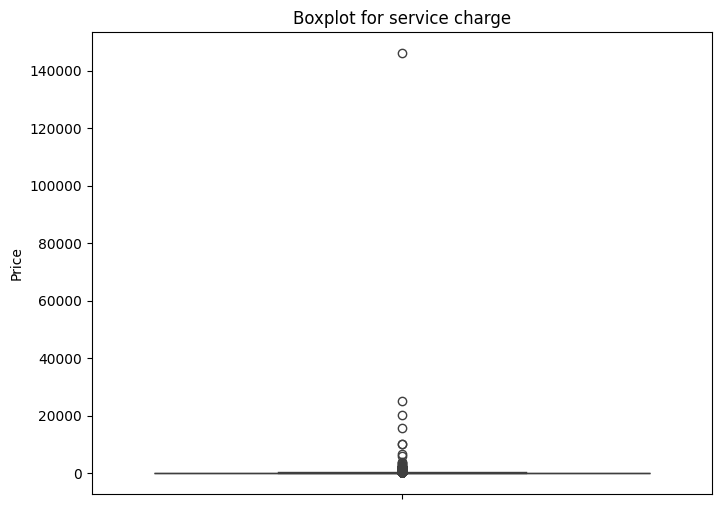

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['serviceCharge'])
plt.title('Boxplot for service charge')
plt.ylabel('Price')
plt.show()

We have outliers which we can remove by using interquartile range method:

In [11]:
Q1 = df['serviceCharge'].quantile(0.25)
Q3 = df['serviceCharge'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['serviceCharge'] >= lower_bound) & (df['serviceCharge'] <= upper_bound)]

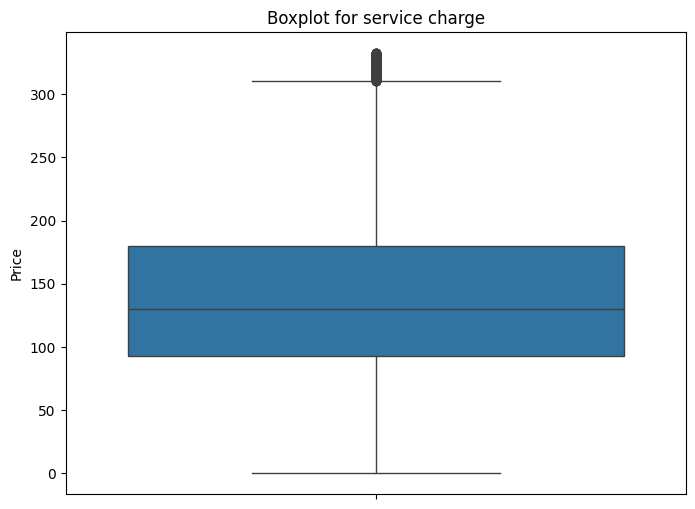

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['serviceCharge'])
plt.title('Boxplot for service charge')
plt.ylabel('Price')
plt.show()

We have 3% of missing data. The easiest way to slove this problem is filling with median

In [13]:
median_value_s_charge = df['serviceCharge'].median()
df['serviceCharge'] = df['serviceCharge'].fillna(median_value_s_charge)

Checking the reslts:

In [14]:
df[df['serviceCharge'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling missing data in column 'heatingType'**

We have 17% of missing data. There are several ways we can solve the problem:

The first one is by searching '%heizung%' in the description, so we could transfer it into heatingType column

In [15]:
df[df['description'].str.contains(r'%heizung%', case=False, na=False)]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


Unfortunately, there is no such information. So another way to fill the missing data is using mode

In [16]:
mode_value_heating = df['heatingType'].mode()[0]
df['heatingType'] = df['heatingType'].fillna(mode_value_heating)

Checking the reslts:

In [17]:
df[df['heatingType'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling missing data in column 'telekomTvOffer'**

We have 12% of missing data. Let's see which values are available:

In [18]:
value_counts_offer = df['telekomTvOffer'].value_counts()
print(value_counts_offer)

telekomTvOffer
ONE_YEAR_FREE    213739
NONE               4691
ON_DEMAND          3417
Name: count, dtype: int64


We may also fill it with the mode

In [19]:
mode_value_offer = df['telekomTvOffer'].mode()[0]
df['telekomTvOffer'] = df['telekomTvOffer'].fillna(mode_value_offer)

Checking the reslts:

In [20]:
df[df['telekomTvOffer'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling missing data in column 'telekomUploadSpeed '**

Column telekomUploadSpeed has 12% of missing data. We will fill it with the median

In [21]:
median_value_speed = df['telekomUploadSpeed'].median()
df['telekomUploadSpeed'] = df['telekomUploadSpeed'].fillna(median_value_speed)

Checking the result:

In [22]:
df[df['telekomUploadSpeed'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling missing data in column 'totalRent '**

Lets check for outliers in totalRent:

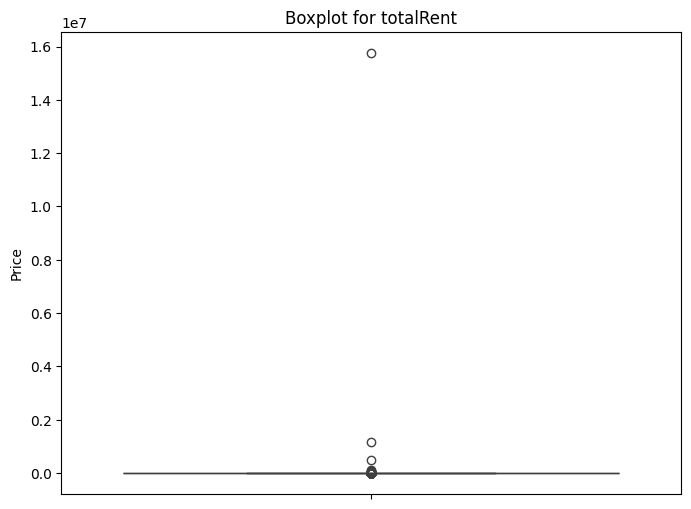

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['totalRent'])
plt.title('Boxplot for totalRent')
plt.ylabel('Price')
plt.show()

We have outlies so we need to use IQR

In [24]:
Q1 = df['totalRent'].quantile(0.25)
Q3 = df['totalRent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['totalRent'] >= lower_bound) & (df['totalRent'] <= upper_bound)]

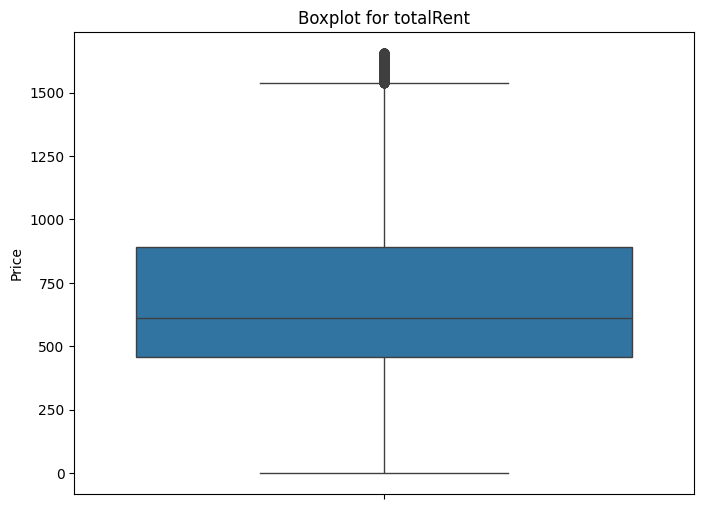

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['totalRent'])
plt.title('Boxplot for totalRent')
plt.ylabel('Price')
plt.show()

Column totalRent has 15% of missing data. We will fill it with the median

In [26]:
median_value_total_rent = df['totalRent'].median()
df['totalRent'] = df['totalRent'].fillna(median_value_total_rent)

Checking the results

In [27]:
df[df['totalRent'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling outliers in column 'baseRent'**

Let`s check if we have outiners in baseRent:

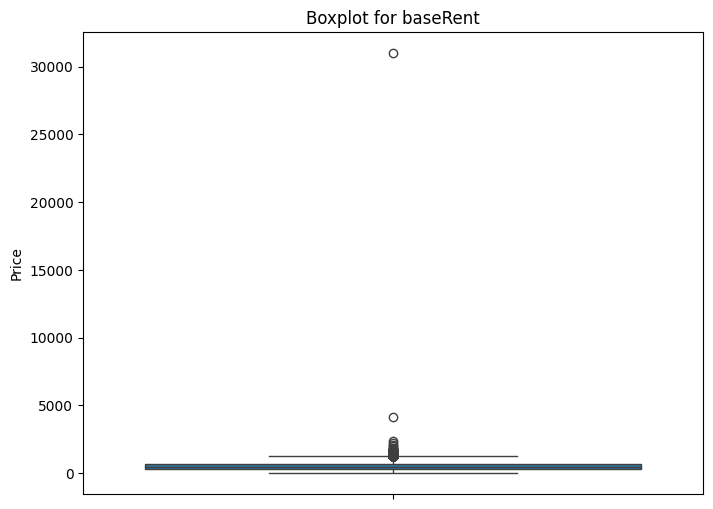

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['baseRent'])
plt.title('Boxplot for baseRent')
plt.ylabel('Price')
plt.show()

Let`s remove all outliers by IQR:

In [29]:
Q1 = df['baseRent'].quantile(0.25)
Q3 = df['baseRent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['baseRent'] >= lower_bound) & (df['baseRent'] <= upper_bound)]

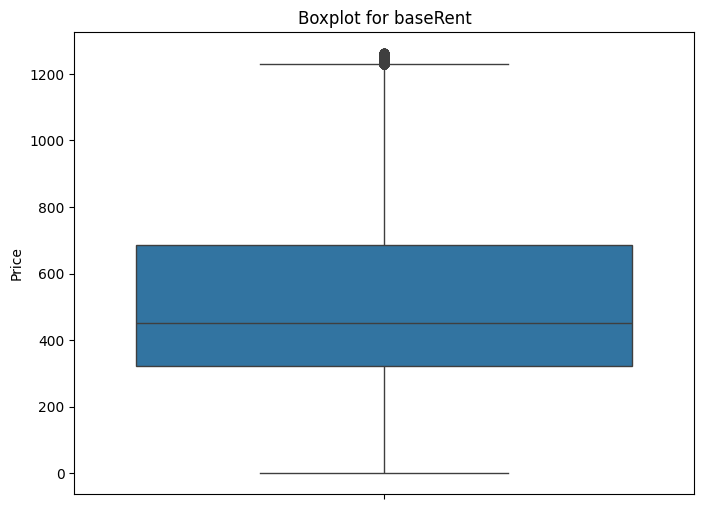

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['baseRent'])
plt.title('Boxplot for baseRent')
plt.ylabel('Price')
plt.show()

**Handling missing data in column 'yearConstructed'**

We have 25% of missing data in yearConstructed. We will fill it with the mode value

In [31]:
mode_value_year = df['yearConstructed'].mode()[0]
df['yearConstructed'] = df['yearConstructed'].fillna(mode_value_year)

Checking the results

In [32]:
df[df['yearConstructed'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling missing data in column 'noParkSpaces'**

As we can see, column noParkSpaces has 65% missing data. So, to understand what we have to do with this column, we have to make some calculations. We need to check if noParkSpaces correlates with totalRent and baseRent by finding Pearson correlation coefficient:

In [33]:
df['noParkSpaces'].corr(df['totalRent'])

-0.017178249154428588

In [34]:
df['noParkSpaces'].corr(df['baseRent'])

-0.017770434729120946

As a calculation result, the correlation is extremely slow. Therefore, filling the gaps in noParksSpaces does not seem appropriate. The easiest way is to remove this column out of data set.

In [35]:
df.drop(columns=['noParkSpaces'], inplace=True)

**Handling missing data in column 'firingTypes '**

We have 21% of missing data in 'firingTypes '. Let's see what data is represented inside

In [36]:
value_counts_firing = df['firingTypes'].value_counts()
print(value_counts_firing)

firingTypes
gas                                                                                                                                                                                            84928
district_heating                                                                                                                                                                               37287
oil                                                                                                                                                                                            13866
natural_gas_light                                                                                                                                                                               7973
electricity                                                                                                                                                                                     3520
   

Let's get first 10 most popular types of firing:

In [37]:
top_10_values = df['firingTypes'].value_counts().nlargest(10).index
print(top_10_values)

Index(['gas', 'district_heating', 'oil', 'natural_gas_light', 'electricity',
       'natural_gas_heavy', 'pellet_heating', 'geothermal', 'gas:electricity',
       'steam_district_heating'],
      dtype='object', name='firingTypes')


Let's define a function that will fill empty spaces in a column with a random value from first 10 types

In [38]:
def fill_na_with_top_values(value):
    if pd.isna(value):
        return np.random.choice(top_10_values)
    return value

In [39]:
df['firingTypes'] = df['firingTypes'].apply(fill_na_with_top_values)

Checking the results:

In [40]:
df[df['firingTypes'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling missing data in column 'Condition'**

We have 25% of missing data in column condition. Firslty, let's see values of this column

In [41]:
value_counts_condition = df['condition'].value_counts(normalize=True)
print(value_counts_condition)

condition
well_kept                             0.344361
refurbished                           0.153086
fully_renovated                       0.136505
mint_condition                        0.095138
modernized                            0.091158
first_time_use                        0.083986
first_time_use_after_refurbishment    0.077020
negotiable                            0.011429
need_of_renovation                    0.007291
ripe_for_demolition                   0.000026
Name: proportion, dtype: float64


We will fill the gaps with existing values by random (taking into account the popularity of the values)

In [42]:
missing_count_condition = df['condition'].isna().sum()

random_filled_values = np.random.choice(
    value_counts_condition.index,
    size=missing_count_condition,
    p=value_counts_condition.values
)

df.loc[df['condition'].isna(), 'condition'] = random_filled_values

Checking the results:

In [43]:
df[df['condition'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling missing data in column 'interiorQual'**

We have 42% of missing data in interiorQual. Let's check what values are represetned in the column:

In [44]:
value_counts_interior = df['interiorQual'].value_counts(normalize=True)
print(value_counts_interior)

interiorQual
normal           0.587424
sophisticated    0.374656
luxury           0.024854
simple           0.013066
Name: proportion, dtype: float64


Lets fill the gaps with existing values by random spreading with taking into account the popularity of the values

In [45]:
missing_count_interior = df['interiorQual'].isna().sum()

random_filled_values = np.random.choice(
    value_counts_interior.index,
    size=missing_count_interior,
    p=value_counts_interior.values
)

df.loc[df['interiorQual'].isna(), 'interiorQual'] = random_filled_values

Checking the results:

In [46]:
df[df['interiorQual'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling missing data in column 'petsAllowed'**

We have 43% of missing values in petsAllowed column with values yes or no. Firslty, we need to convert yes to 1, and no to 0 for better analysis:

In [47]:
df['petsAllowed'] = df['petsAllowed'].map({'yes': 1, 'no': 0, 'unknown': -1})

No we can check how it effects totalRent and baseRent by calculating Pearson correlation coefficient:

In [48]:
df['petsAllowed'].corr(df['totalRent'])

-0.1771957559939866

In [49]:
df['petsAllowed'].corr(df['baseRent'])

-0.20548703889998163

Let's fill the gaps with normal distribution

In [50]:
value_counts_pets = df['petsAllowed'].value_counts(normalize=True)
print(value_counts_pets)

petsAllowed
0.0    0.826342
1.0    0.173658
Name: proportion, dtype: float64


In [51]:
missing_count_pets = df['petsAllowed'].isna().sum()

random_filled_values = np.random.choice(
    value_counts_pets.index,
    size=missing_count_pets,
    p=value_counts_pets.values
)

df.loc[df['petsAllowed'].isna(), 'petsAllowed'] = random_filled_values

Checking the results:

In [52]:
df[df['petsAllowed'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling missing data in column 'typeOfFlat'**

We have 14% of missing data typeOfFlat. Let`s fill the gaps with the mode

In [53]:
value_counts_flat = df['typeOfFlat'].value_counts(normalize=True)
print(value_counts_flat)

typeOfFlat
apartment              0.571558
roof_storey            0.155355
ground_floor           0.140633
other                  0.043505
maisonette             0.031479
raised_ground_floor    0.026185
terraced_flat          0.012423
half_basement          0.009399
penthouse              0.006651
loft                   0.002811
Name: proportion, dtype: float64


In [54]:
mode_value_flat = df['typeOfFlat'].mode()[0]
df['typeOfFlat'] = df['typeOfFlat'].fillna(mode_value_flat)

Check the results:

In [55]:
df[df['typeOfFlat'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling missing data in column 'thermalChar'**

Let`s check if we have outliers in thermalChar:

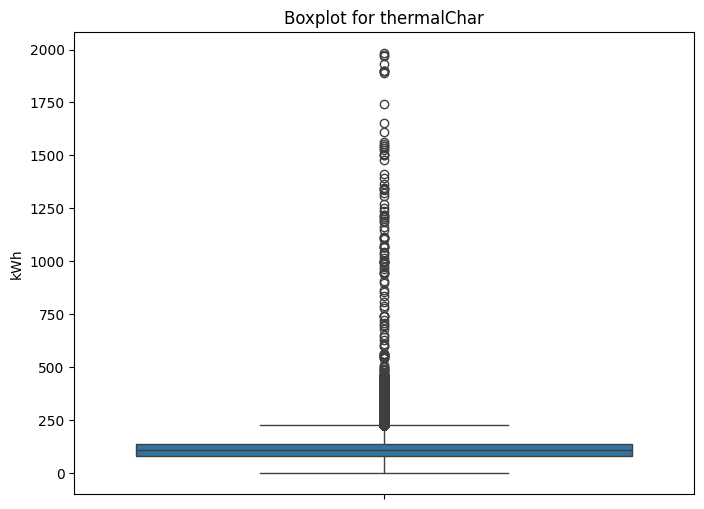

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['thermalChar'])
plt.title('Boxplot for thermalChar')
plt.ylabel('kWh')
plt.show()

Let's remove outliers with IQR:

In [57]:
Q1 = df['thermalChar'].quantile(0.25)
Q3 = df['thermalChar'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['thermalChar'] >= lower_bound) & (df['thermalChar'] <= upper_bound)]

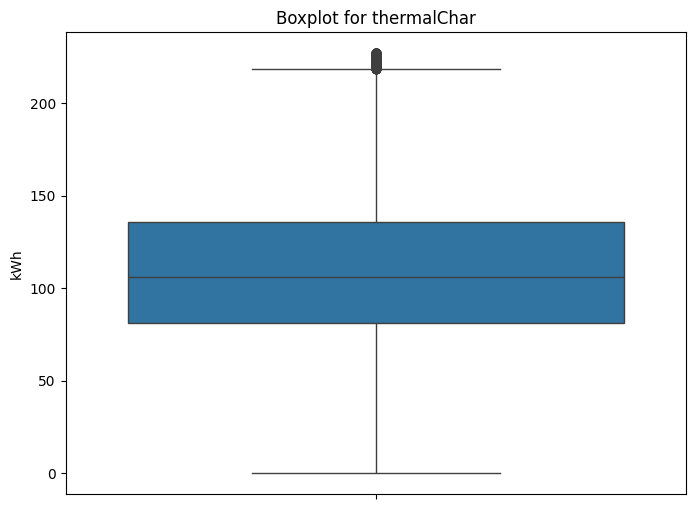

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['thermalChar'])
plt.title('Boxplot for thermalChar')
plt.ylabel('kWh')
plt.show()

We have 40% of missing data in thermalChar. Let's see what values are in this column:

In [59]:
value_counts_thermal = df['thermalChar'].value_counts(normalize=True)
print(value_counts_thermal)

thermalChar
105.00    0.006451
100.00    0.006256
79.00     0.006018
114.00    0.005985
87.00     0.005900
            ...   
161.06    0.000008
126.26    0.000008
202.75    0.000008
78.06     0.000008
160.77    0.000008
Name: proportion, Length: 5626, dtype: float64


Let's fill the gaps with mean value:

In [60]:
mean_value_thermal = df['thermalChar'].mean()
df['thermalChar'] = df['thermalChar'].fillna(mean_value_thermal)

Checking the results:

In [61]:
df[df['thermalChar'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling missing data in column 'floor'**

Let's check if we have outliers in floor

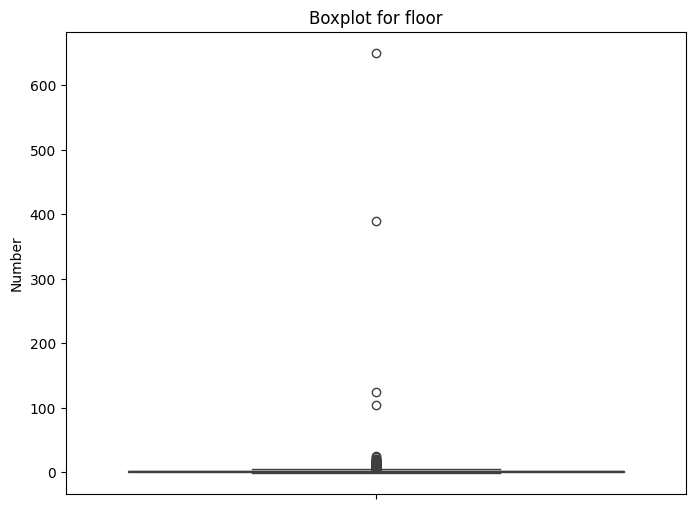

In [62]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['floor'])
plt.title('Boxplot for floor')
plt.ylabel('Number')
plt.show()

Let`s remove outliers with IQR:

In [63]:
Q1 = df['floor'].quantile(0.25)
Q3 = df['floor'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['floor'] >= lower_bound) & (df['floor'] <= upper_bound)]

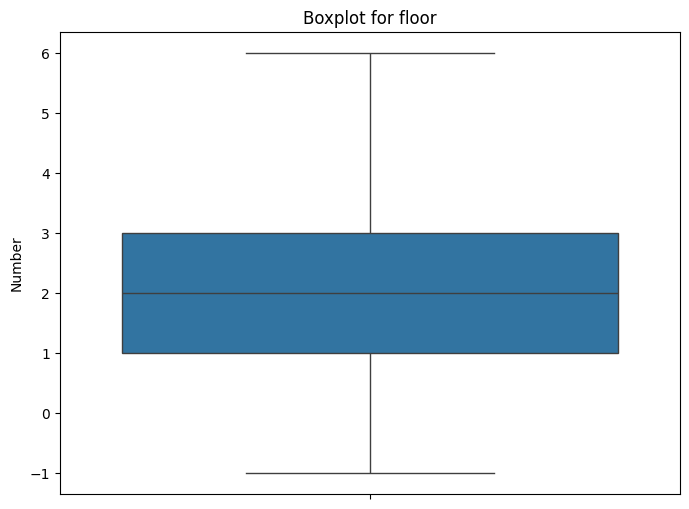

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['floor'])
plt.title('Boxplot for floor')
plt.ylabel('Number')
plt.show()

We have 19% of missing data in column floor. Let`s fill it with mode:

In [65]:
mode_value_floor = df['floor'].mode()[0]
df['floor'] = df['floor'].fillna(mode_value_floor)

Check the results:

In [66]:
df[df['floor'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling missing data in column 'description'**

We have 7% of missing data in description column. While it's filled with full description about a flat, it is easier to drop all null values

In [67]:
df = df.dropna(subset=['description'])

Check the results:

In [68]:
df[df['description'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling missing values in column 'heatingCosts'**

Let`s check if we have outliers in heatingCosts:

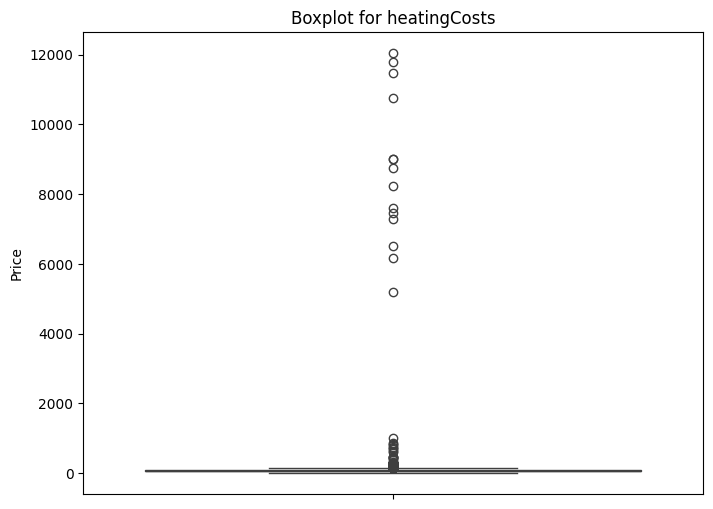

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['heatingCosts'])
plt.title('Boxplot for heatingCosts')
plt.ylabel('Price')
plt.show()

Let's remove outliers with IQR:

In [70]:
Q1 = df['heatingCosts'].quantile(0.25)
Q3 = df['heatingCosts'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['heatingCosts'] >= lower_bound) & (df['heatingCosts'] <= upper_bound)]

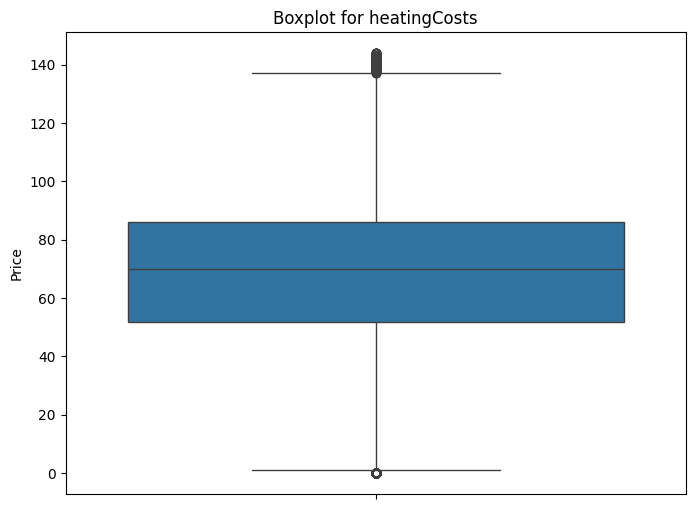

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['heatingCosts'])
plt.title('Boxplot for heatingCosts')
plt.ylabel('Price')
plt.show()

We have 68% of missing data in column heatingCosts. Let's see what values we have:

In [72]:
value_counts_heating = df['heatingCosts'].value_counts(normalize=True)
print(value_counts_heating)

heatingCosts
60.00     0.062541
70.00     0.058464
80.00     0.057031
50.00     0.051907
100.00    0.043007
            ...   
30.59     0.000028
37.20     0.000028
79.88     0.000028
109.62    0.000028
112.13    0.000028
Name: proportion, Length: 2906, dtype: float64


Let's fill the gaps with mean value:

In [73]:
mean_value_heating = df['heatingCosts'].mean()
df['heatingCosts'] = df['heatingCosts'].fillna(mean_value_thermal)

Check the results:

In [74]:
df[df['heatingCosts'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling with missing data in column 'energyEfficiencyClass'**

We have 71% missing data in column energyEfficiencyClass. Let's see the values inside:

In [75]:
value_counts_energy = df['energyEfficiencyClass'].value_counts(normalize=True)
print(value_counts_energy)

energyEfficiencyClass
C                 0.221013
NO_INFORMATION    0.196871
D                 0.191614
B                 0.145712
E                 0.109345
F                 0.057637
A                 0.039362
A_PLUS            0.024448
G                 0.012285
H                 0.001711
Name: proportion, dtype: float64


The best way to fill gaps here is with mode

In [76]:
mode_value_energy = df['energyEfficiencyClass'].mode()[0]
df['energyEfficiencyClass'] = df['energyEfficiencyClass'].fillna(mode_value_energy)

Checking the results:

In [77]:
df[df['energyEfficiencyClass'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Handling outliers in livingSpace**

Let`s check if we have outliers in livingSpace:

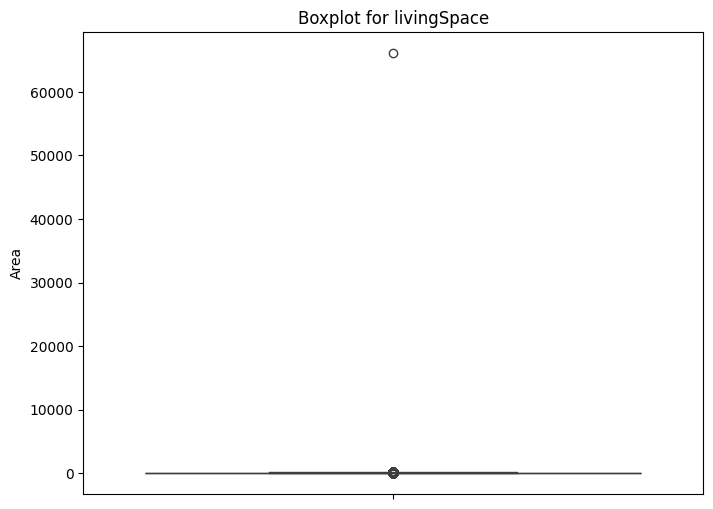

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['livingSpace'])
plt.title('Boxplot for livingSpace')
plt.ylabel('Area')
plt.show()

We can manage with outliers by IQR

In [79]:
Q1 = df['livingSpace'].quantile(0.25)
Q3 = df['livingSpace'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['livingSpace'] >= lower_bound) & (df['livingSpace'] <= upper_bound)]

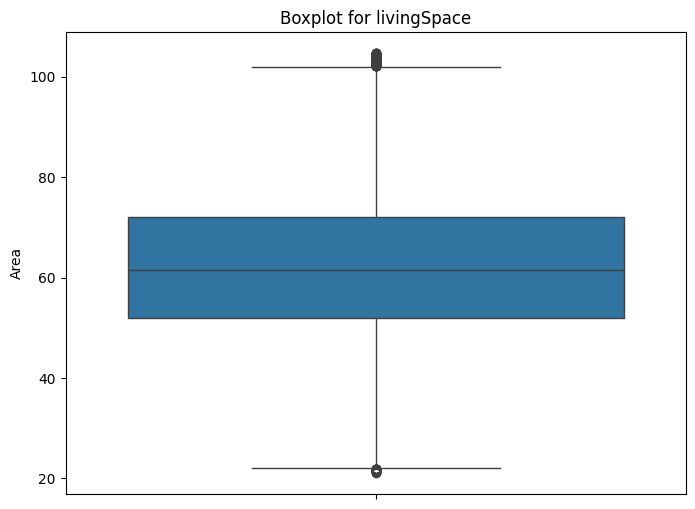

In [80]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['livingSpace'])
plt.title('Boxplot for livingSpace')
plt.ylabel('Area')
plt.show()

**Handling missing data in column 'lastRefurbish'**

We have 70% of missing data in column 'lastRefurbish'. Let's see the values:

In [81]:
value_counts_refurbish = df['lastRefurbish'].value_counts(normalize=True)
print(value_counts_refurbish)

lastRefurbish
2019.0    0.232093
2018.0    0.154052
2017.0    0.087556
2016.0    0.064999
2015.0    0.056446
2014.0    0.043832
2020.0    0.037203
2012.0    0.028223
1998.0    0.027047
2013.0    0.025551
2010.0    0.023412
1995.0    0.020633
1997.0    0.020205
2011.0    0.017746
2000.0    0.017533
1999.0    0.016891
2008.0    0.015181
2002.0    0.012508
1996.0    0.011225
2009.0    0.010904
2001.0    0.010584
1994.0    0.010049
2005.0    0.008873
2004.0    0.008766
2007.0    0.008018
2006.0    0.007804
2003.0    0.005880
1993.0    0.005452
1992.0    0.002886
1990.0    0.002352
1991.0    0.001817
1985.0    0.000641
1989.0    0.000428
1951.0    0.000321
1988.0    0.000321
1960.0    0.000214
1954.0    0.000214
1950.0    0.000214
1980.0    0.000214
1982.0    0.000214
1971.0    0.000214
1961.0    0.000107
1986.0    0.000107
1957.0    0.000107
1984.0    0.000107
1967.0    0.000107
1900.0    0.000107
1975.0    0.000107
1976.0    0.000107
1968.0    0.000107
1983.0    0.000107
1987.0    0.00010

We will fill the gaps with median

In [82]:
mean_value_refurbish = df['lastRefurbish'].mean()
df['lastRefurbish'] = df['lastRefurbish'].fillna(mean_value_refurbish)

Checking results:

In [83]:
df[df['lastRefurbish'].isna()]

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,...,floor,noRoomsRange,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date


**Results**

In [84]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

regio1 - 0%
serviceCharge - 0%
heatingType - 0%
telekomTvOffer - 0%
balcony - 0%
telekomUploadSpeed - 0%
totalRent - 0%
yearConstructed - 0%
firingTypes - 0%
hasKitchen - 0%
cellar - 0%
baseRent - 0%
livingSpace - 0%
condition - 0%
interiorQual - 0%
petsAllowed - 0%
lift - 0%
baseRentRange - 0%
typeOfFlat - 0%
noRooms - 0%
thermalChar - 0%
floor - 0%
noRoomsRange - 0%
garden - 0%
livingSpaceRange - 0%
regio3 - 0%
description - 0%
heatingCosts - 0%
energyEfficiencyClass - 0%
lastRefurbish - 0%
date - 0%


**Conclusion** 

During the data processing stage, I filled in missing values using medians, modes, normalized values, and means, which improved data completeness and distribution. Removing irrelevant data based on Pearson correlation coefficients allowed me to focus on significant variables, enhancing the accuracy of analysis and modeling.

## Stage 3. Exploratory data analysis

We have 3 questions to answer:  
1. What is the best time of year to start renting a home?  
2. What is the Dependence of rental cost on housing area?
3. What type of housing has been the most successful on average?

**What is the best time of year to start renting a home?**

On kaggle it is said *"This process was repeated three times, so the data set contains offers from the dates 2018-09-22, 2019-05-10 and 2019-10-08."*, so we have data for February, May, September and October.

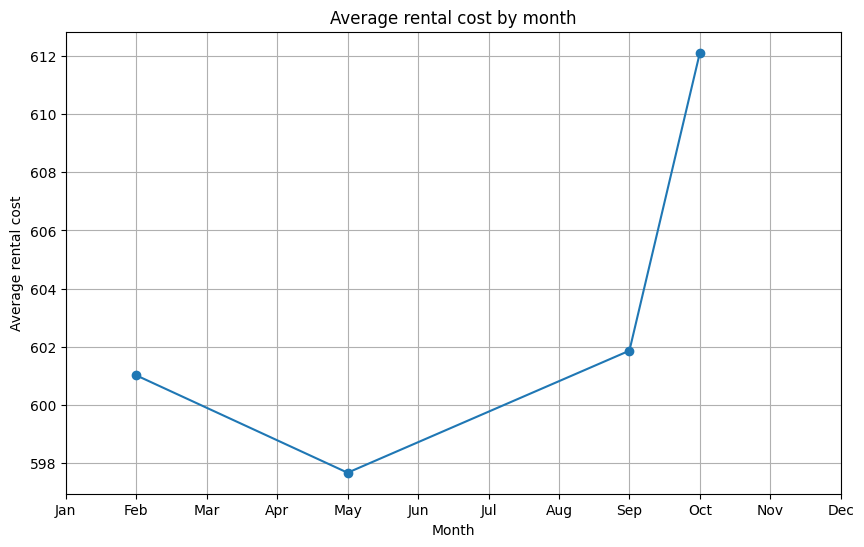

In [85]:
df['date'] = pd.to_datetime(df['date'], format='%b%y')

df['month'] = df['date'].dt.month

monthly_data = df.groupby('month').agg({'totalRent': 'mean', 'date': 'count'}).reset_index()
monthly_data.columns = ['month', 'avg_rent', 'number_of_listings']

plt.figure(figsize=(10, 6))
plt.plot(monthly_data['month'], monthly_data['avg_rent'], marker='o', linestyle='-')
plt.title('Average rental cost by month')
plt.xlabel('Month')
plt.ylabel('Average rental cost')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Аug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

The analysis focuses on available data, which can provide insight into seasonal trends despite the lack of data for the rest of the year.

**Conclusion**  

Average rental costs fluctuates around 597-612 euro. So the best month to rent a flat is May

**What is the Dependence of rental cost on housing area?**

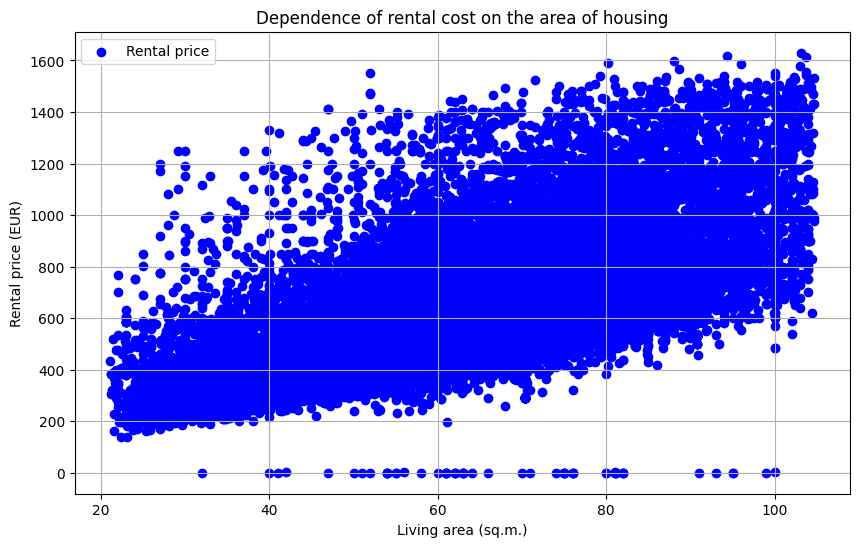

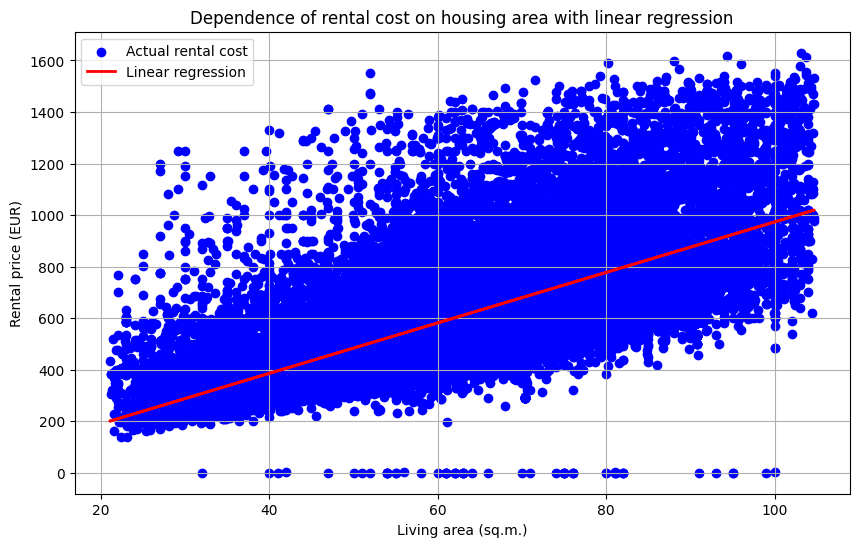

Slope coefficient: 9.794248382410446


In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(df['livingSpace'], df['totalRent'], color='blue', label='Rental price')
plt.title('Dependence of rental cost on the area of ​​housing')
plt.xlabel('Living area (sq.m.)')
plt.ylabel('Rental price (EUR)')
plt.grid(True)
plt.legend()
plt.show()

X = df[['livingSpace']]
y = df['totalRent']

model = LinearRegression()
model.fit(X, y)

df['predicted_rent'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['livingSpace'], df['totalRent'], color='blue', label='Actual rental cost')
plt.plot(df['livingSpace'], df['predicted_rent'], color='red', linewidth=2, label='Linear regression')
plt.title('Dependence of rental cost on housing area with linear regression')
plt.xlabel('Living area (sq.m.)')
plt.ylabel('Rental price (EUR)')
plt.grid(True)
plt.legend()
plt.show()

print(f'Slope coefficient: {model.coef_[0]}')


**Conclusion**

Our linear regression reliably shows the dependence of the rental price on the living area. The more area is, the higher price is for the flat.

**What type of housing has been the most successful on average?**

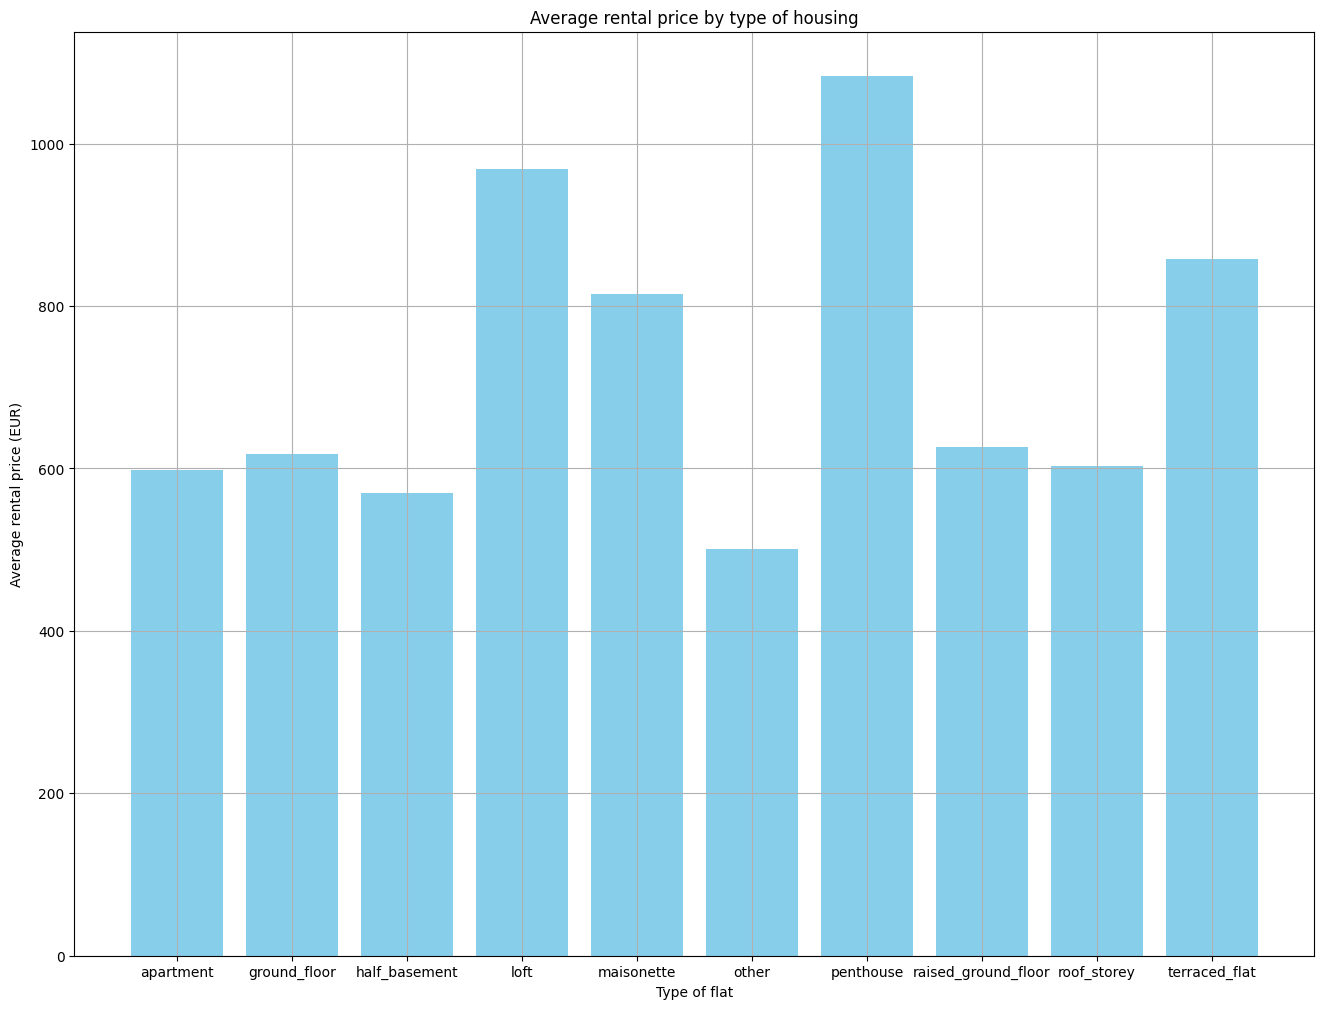

            typeOfFlat    totalRent
0            apartment   598.164764
1         ground_floor   617.335584
2        half_basement   569.759474
3                 loft   969.281000
4           maisonette   815.191209
5                other   500.192340
6            penthouse  1083.716447
7  raised_ground_floor   626.031418
8          roof_storey   602.839070
9        terraced_flat   858.057744


In [87]:
average_rent_by_type = df.groupby('typeOfFlat')['totalRent'].mean().reset_index()

plt.figure(figsize=(16, 12))
plt.bar(average_rent_by_type['typeOfFlat'], average_rent_by_type['totalRent'], color='skyblue')
plt.title('Average rental price by type of housing')
plt.xlabel('Type of flat')
plt.ylabel('Average rental price (EUR)')
plt.grid(True)
plt.show()

print(average_rent_by_type)

**Conclusion**

The most valuable types are penthouse and loft. The least are half basement and others.

## Stage 4. Analysis of factors affecting rental costs

Let's take a deeper look at the relationship of all variables to see what correlates the most to baseRent:

Firstly, let's update all the columns to numeric values, so we can show the correlation between all the variables and not only the ones with numerical values. This will help us to understand which variables are strongly or weakly correlated with each other.

In [88]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,regio1,serviceCharge,heatingType,telekomTvOffer,balcony,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,...,garden,livingSpaceRange,regio3,description,heatingCosts,energyEfficiencyClass,lastRefurbish,date,month,predicted_rent
27,13,147.32,2,1,True,40.0,447.62,1977.0,4,False,...,False,2,1467,6502,54.39,3,2012.91052,2020-02-01,2,548.924429
48,14,121.50,0,1,True,40.0,1113.00,2019.0,36,True,...,False,4,1271,7638,121.50,2,2012.91052,2019-10-01,10,787.316434
58,12,40.00,0,1,False,2.4,340.00,1930.0,36,False,...,False,2,2612,25232,60.00,3,2012.91052,2018-09-01,9,431.393448
59,12,85.00,0,1,True,40.0,425.00,1909.0,15,True,...,False,2,294,19901,60.00,5,2014.00000,2020-02-01,2,514.252789
61,2,79.00,0,1,False,40.0,955.00,1918.0,15,False,...,False,3,3177,24909,68.00,3,2012.91052,2019-10-01,10,607.396092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268815,13,79.20,0,1,True,40.0,494.16,1984.0,4,False,...,False,3,2897,4674,85.09,3,2012.91052,2020-02-01,2,635.015872
268824,8,255.00,0,1,False,40.0,1298.00,1900.0,4,False,...,False,5,1646,26928,102.00,9,2012.91052,2019-10-01,10,991.134743
268829,2,250.94,2,1,True,40.0,828.77,1972.0,4,False,...,False,3,2776,3537,80.09,3,2012.91052,2018-09-01,9,705.436518
268840,6,112.13,2,1,True,2.4,1479.64,2016.0,4,True,...,True,4,2350,19892,112.13,1,2016.00000,2018-09-01,9,872.232568


Now we can calculate the highest correlation and visualize the data:

In [89]:
corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs) > 0.5]  

high_corr

serviceCharge          predicted_rent           0.518139
predicted_rent         serviceCharge            0.518139
serviceCharge          livingSpace              0.518139
livingSpace            serviceCharge            0.518139
predicted_rent         heatingCosts             0.520431
                                                  ...   
heatingCosts           heatingCosts             1.000000
energyEfficiencyClass  energyEfficiencyClass    1.000000
lastRefurbish          lastRefurbish            1.000000
petsAllowed            petsAllowed              1.000000
predicted_rent         predicted_rent           1.000000
Length: 81, dtype: float64

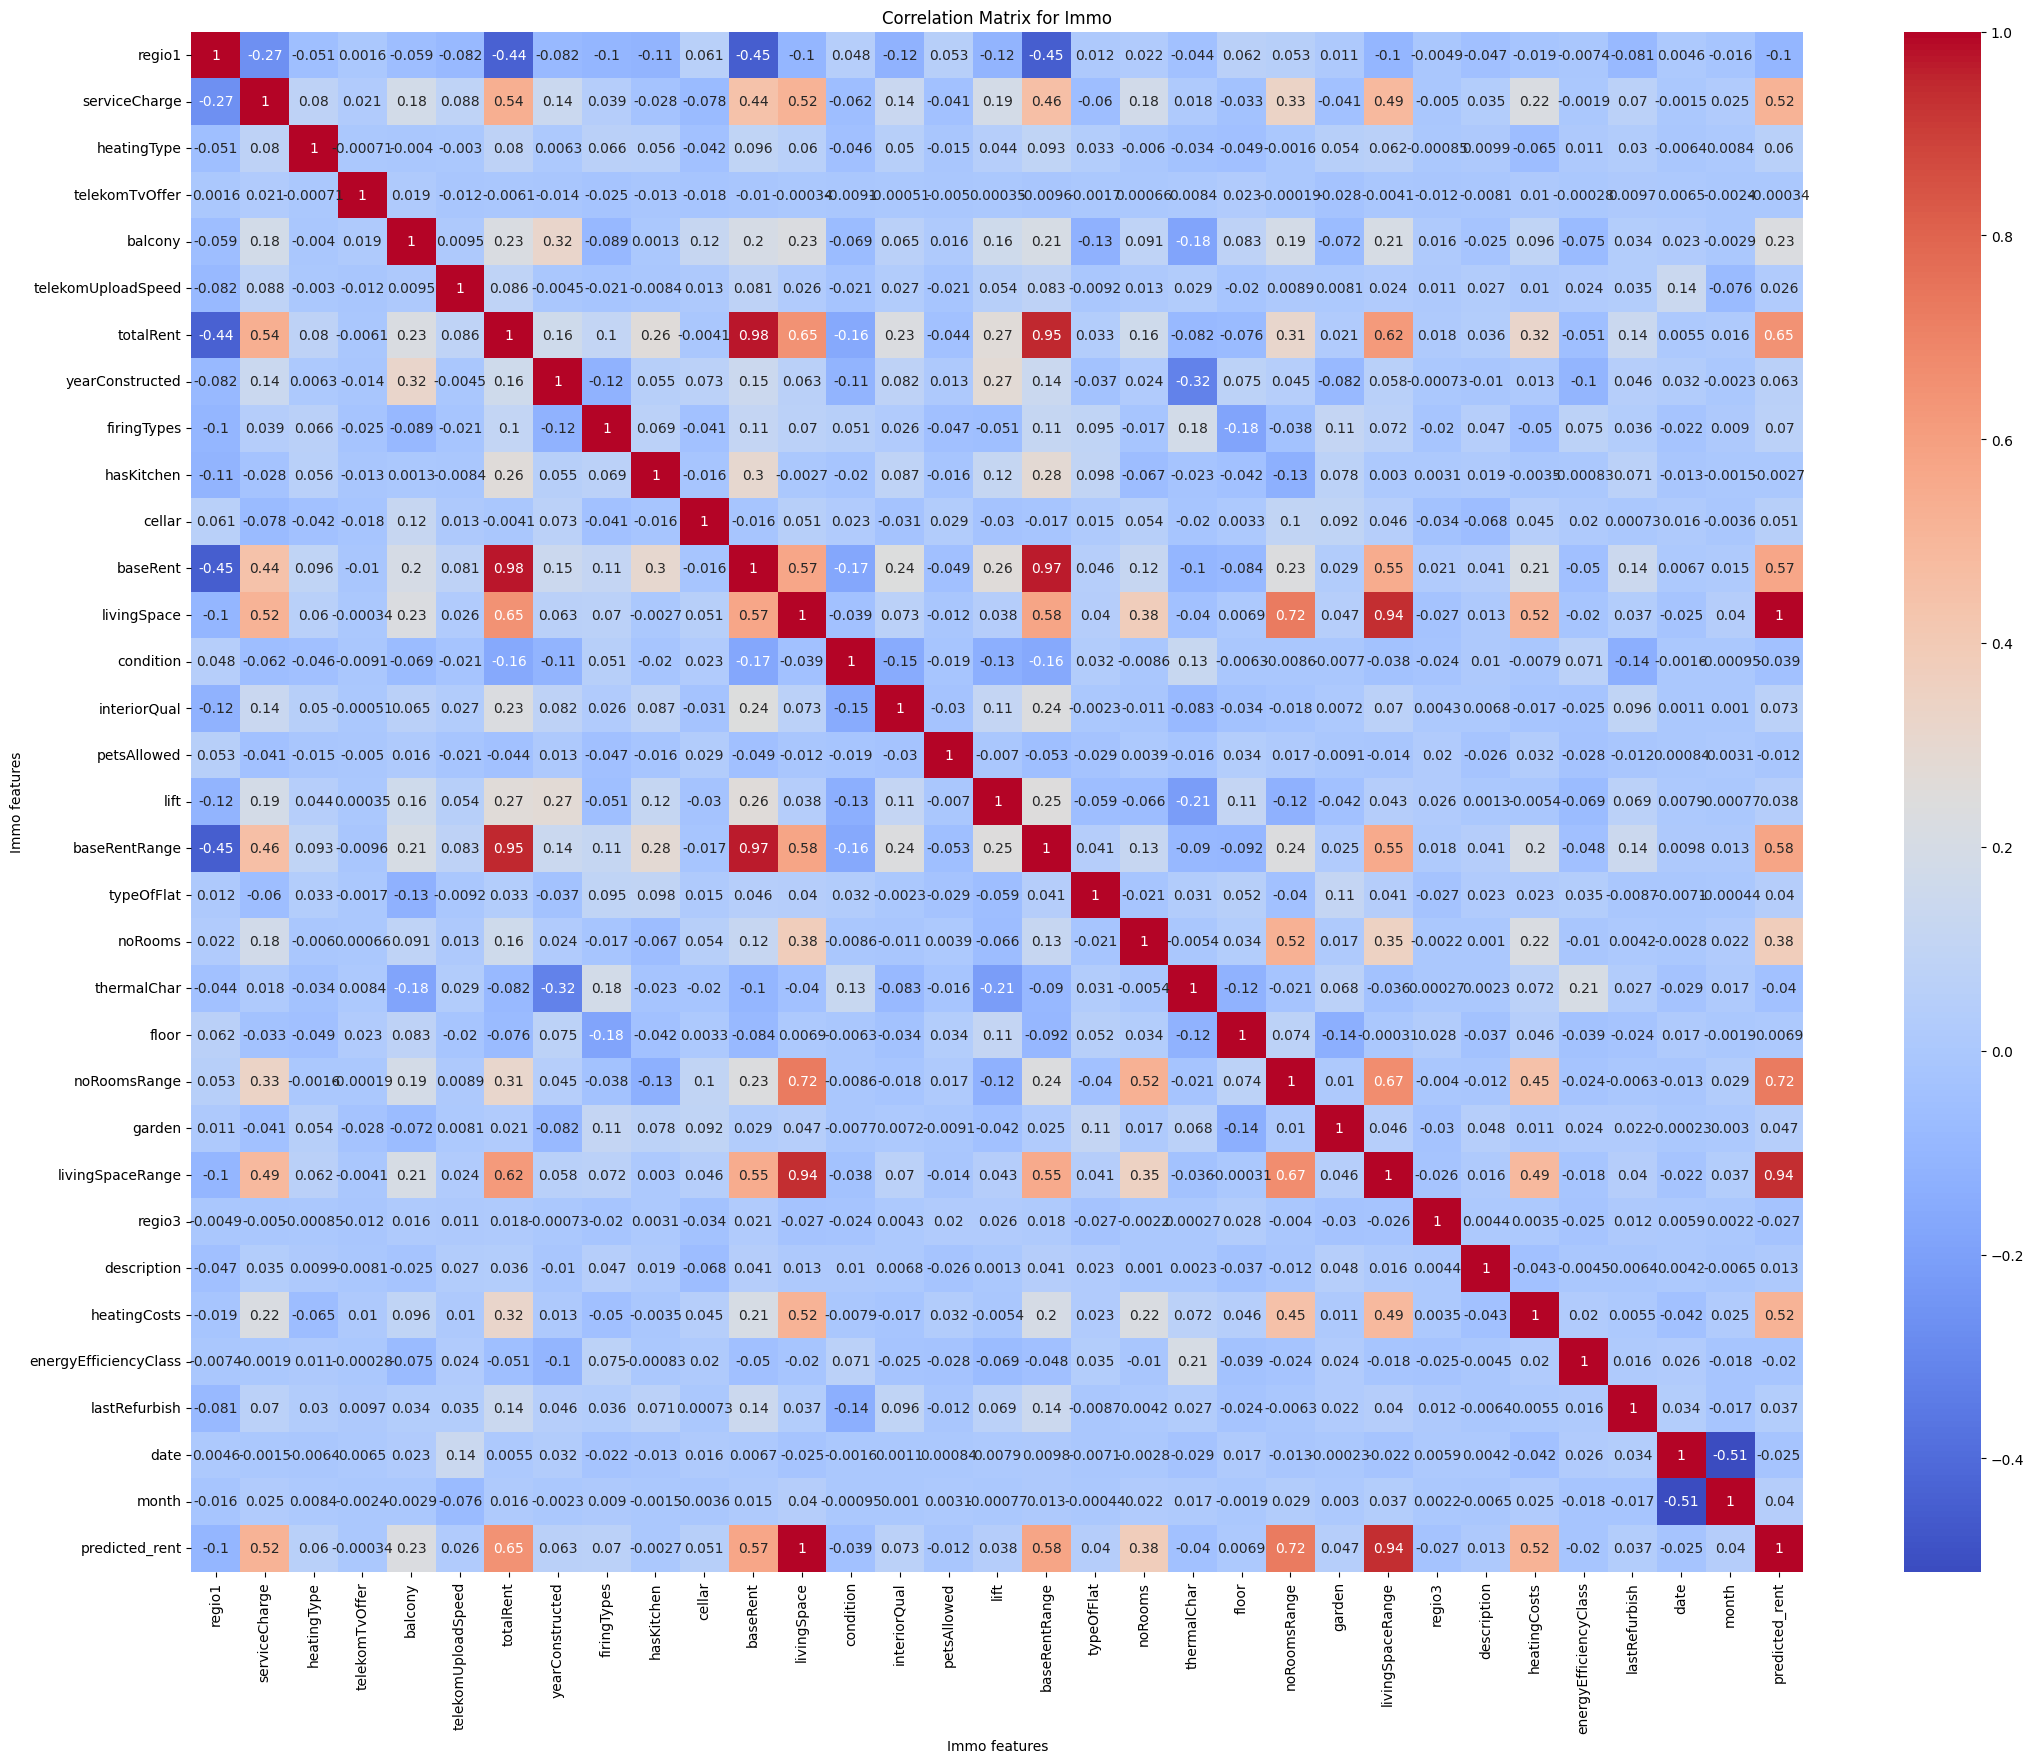

In [90]:
plt.figure(figsize=(26, 20))

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Immo")
plt.xlabel("Immo features")
plt.ylabel("Immo features")
plt.show()

**Conclusion**

The factors that have the most influence the TotalRent are serviceCharge, baseRent, livingSpace, livingSpaceRange. The most descending influence has region.

## Stage 5. Analysis of rental availability in different regions

Now let`s findout, where is the highest average base rent prices accross all germany regions

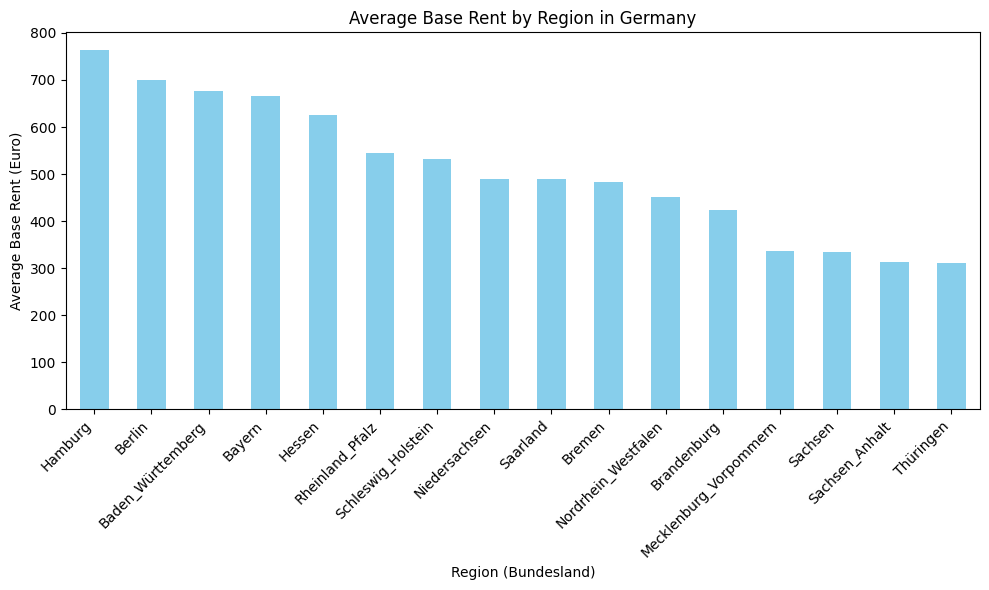

In [91]:
avg_rent_by_region = df.groupby('regio1')['baseRent'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_rent_by_region.plot(kind='bar', color='skyblue')
plt.title('Average Base Rent by Region in Germany')
plt.xlabel('Region (Bundesland)')
plt.ylabel('Average Base Rent (Euro)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

                    Region  NumberOfListings
0      Nordrhein_Westfalen              9883
1                  Sachsen              6824
2           Sachsen_Anhalt              4323
3                   Berlin              2391
4   Mecklenburg_Vorpommern              1905
5            Niedersachsen              1784
6       Schleswig_Holstein              1520
7                Thüringen              1393
8              Brandenburg              1355
9                   Bayern              1145
10                  Hessen               824
11                 Hamburg               553
12                  Bremen               535
13       Baden_Württemberg               374
14         Rheinland_Pfalz               357
15                Saarland                51


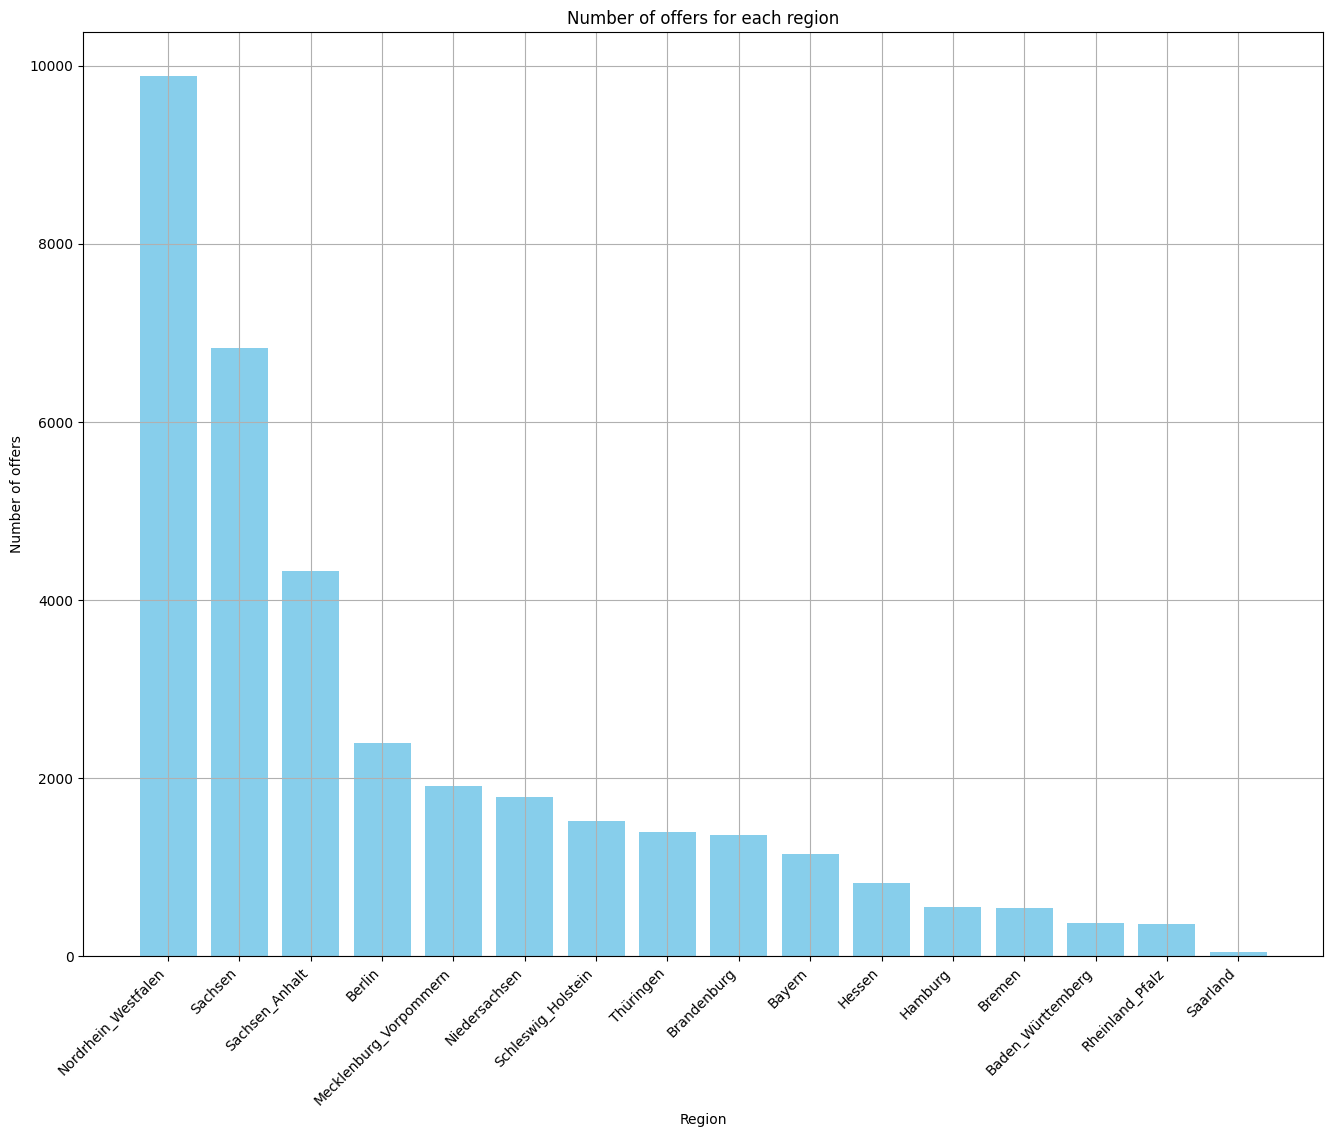

In [92]:
count_by_region = df['regio1'].value_counts().reset_index()
count_by_region.columns = ['Region', 'NumberOfListings']

print(count_by_region)

plt.figure(figsize=(16, 12))
plt.bar(count_by_region['Region'], count_by_region['NumberOfListings'], color='skyblue')
plt.title('Number of offers for each region')
plt.xlabel('Region')
plt.ylabel('Number of offers')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

**Conclusion**

The highest avarage base rent prices are in Hamburg, Berlin and Baden-Wuttemberg. The most number of offers are in Nordrhein-Westfalen, Sachsen and Sachsen-Anhalt

## Stage 6. Analysis of infrastructure characteristics of objects

Now let`s findout how infrustructure objects, like balcony, lift, garden and kitchen, affect the baseRent

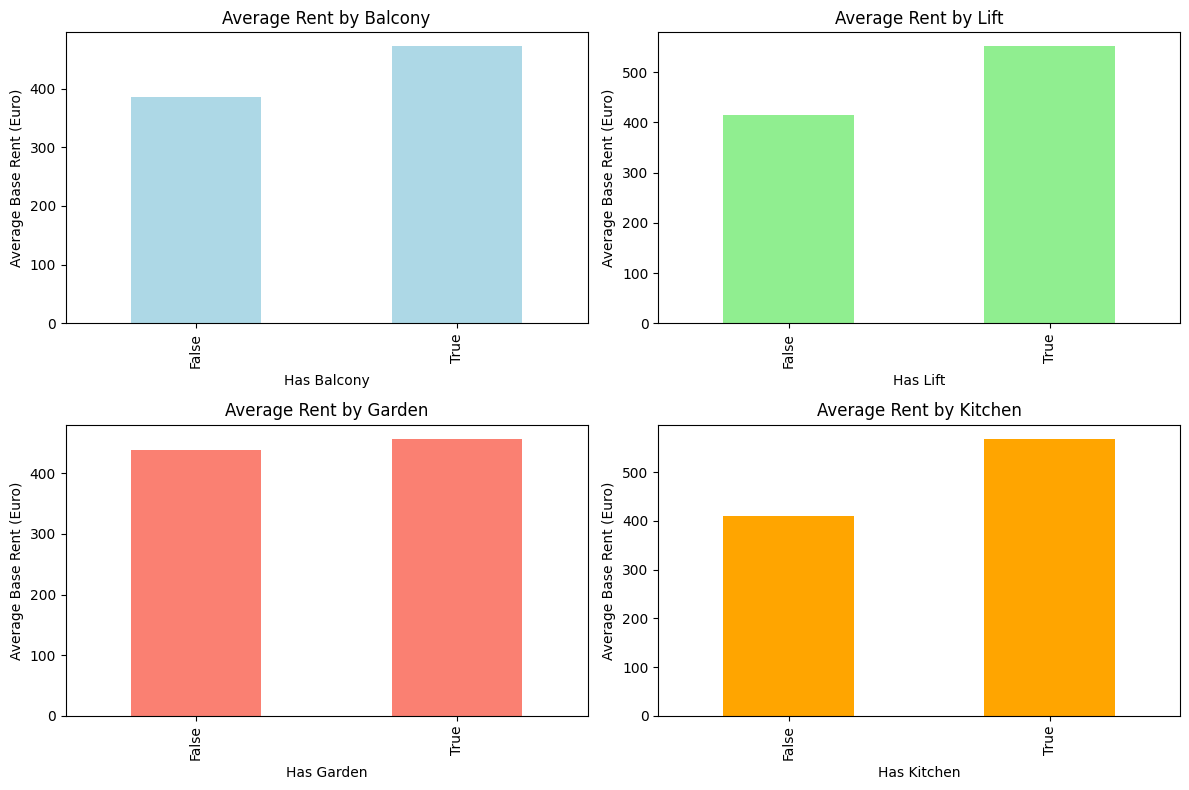

balcony
False    384.824134
True     472.126671
Name: baseRent, dtype: float64
 
lift
False    414.670493
True     551.486911
Name: baseRent, dtype: float64
 
garden
False    438.544828
True     457.105706
Name: baseRent, dtype: float64
 
hasKitchen
False    410.750030
True     568.417137
Name: baseRent, dtype: float64


In [93]:
avg_rent_balcony = df.groupby('balcony')['baseRent'].mean()
avg_rent_lift = df.groupby('lift')['baseRent'].mean()
avg_rent_garden = df.groupby('garden')['baseRent'].mean()
avg_rent_kitchen = df.groupby('hasKitchen')['baseRent'].mean()

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
avg_rent_balcony.plot(kind='bar', color='lightblue')
plt.title('Average Rent by Balcony')
plt.xlabel('Has Balcony')
plt.ylabel('Average Base Rent (Euro)')

plt.subplot(2, 2, 2)
avg_rent_lift.plot(kind='bar', color='lightgreen')
plt.title('Average Rent by Lift')
plt.xlabel('Has Lift')
plt.ylabel('Average Base Rent (Euro)')

plt.subplot(2, 2, 3)
avg_rent_garden.plot(kind='bar', color='salmon')
plt.title('Average Rent by Garden')
plt.xlabel('Has Garden')
plt.ylabel('Average Base Rent (Euro)')

plt.subplot(2, 2, 4)
avg_rent_kitchen.plot(kind='bar', color='orange')
plt.title('Average Rent by Kitchen')
plt.xlabel('Has Kitchen')
plt.ylabel('Average Base Rent (Euro)')

plt.tight_layout()
plt.show()

print(avg_rent_balcony)
print(" ")
print(avg_rent_lift)
print(" ")
print(avg_rent_garden)
print(" ")
print(avg_rent_kitchen)

**Conclusion**

If a house has:  
1. a balcony, there is a difference in 88 euro;
2. a lift, there is a difference in 137 euro;
3. a garden, there is a 19 euro difference;
4. a kitchen, there is 158 euro difference.

## Stage 7. Testing hypotheses

**Testing Hypothesis #1. Hypothesis on the influence of infrastructure characteristics on rental prices**

Null Hypothesis: Apartments with amenities such as balcony, elevator and garden are rented at the same price.  
Alternative Hypothesis: Apartments with amenities such as balcony, elevator and garden are rented at a higher price.

In [94]:
df['with_amenities'] = df[['balcony','lift','garden']].sum(axis=1) > 0

prices_with_amenities = df[df['with_amenities'] == True]['totalRent']
prices_without_amenities = df[df['with_amenities'] == False]['totalRent']

t_stat, p_value = stats.ttest_ind(prices_with_amenities, prices_without_amenities)

alpha = 0.05

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < alpha:
    print("Reject the Null Hypothesis: Apartments with amenities are rented at a higher price.")
else:
    print("Fail to Reject the Null Hypothesis: There is no significant difference in rental prices based on amenities.")


T-statistic: 36.93305313532071, P-value: 5.436837608472754e-293
Reject the Null Hypothesis: Apartments with amenities are rented at a higher price.


**Testing Hypothesis #2. Hypothesis on the influence of region on rental prices**

Null Hypothesis: There is no differences in rental prices across different regions of Germany.  
Alternative Hypothesis: There are significant differences in rental prices across different regions of Germany.

In [95]:
regions = df['regio1'].unique() 

prices_by_region = [df[df['regio1'] == region]['totalRent'] for region in regions]

f_stat, p_value = stats.f_oneway(*prices_by_region)

alpha = 0.05

print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < alpha:
    print("Reject the Null Hypothesis: There are significant differences in rental prices across different regions.")
else:
    print("Fail to Reject the Null Hypothesis: There are no significant differences in rental prices across different regions.")


F-statistic: 1210.734311442782, P-value: 0.0
Reject the Null Hypothesis: There are significant differences in rental prices across different regions.


## Stage 8. Research results

**Working hypotheses**

* Apartments with amenities such as balcony, elevator, garden and parking spaces are rented at a higher price;
* There are significant differences in rental prices across different regions of Germany.

**General conclusions**

* Seasonal Influence: May is the best month for renting, with the lowest average rental costs from 597 euro.
* Cost Dependence on Area: Rental prices increase linearly with living space, as demonstrated by the linear regression model.
* Housing Types: Penthouses and lofts are the most valuable types of housing, while half basements are the least valuable.
* Factors Affecting Rental Costs: The most significant factors influencing rental prices are service charges, base rent, living space, and living space range.
* The region has the most negative influence on rental costs.
* Regional Availability: The highest average base rent prices are in Hamburg, Berlin, and Baden-Württemberg, while the most rental offers are in Nordrhein-Westfalen, Saxony, and Saxony-Anhalt.
* Infrastructure: The presence of amenities like a balcony, elevator, garden, or kitchen significantly increases rental prices, with kitchens having the largest impact.

**General recommendations**

* Renting in spring: For tenants, May is the best month to sign rental agreements, as rental rates are generally lower.
* Optimizing Housing by Area: It is recommended to rent or offer apartments with optimal living space, as larger areas result in significantly higher rental prices.
* Focus on In-demand Housing Types: Property owners should consider investing in penthouses and lofts, as these types have the highest market value.
* Regional Strategy: Regions with lower rental prices but a high number of offers, such as Saxony and Saxony-Anhalt, may provide better opportunities for tenants.
* Improving Infrastructure: Adding amenities like elevators and kitchens can greatly increase the attractiveness and rental value of a property.